In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from cat_mod.models.hmm import HMMFitter

In [2]:
def prepare_data(path, drop_cols, drop_rows, sheet):
    df = pd.read_excel('data/seuqeunces_final_11_06_25.xlsx', sheet_name=sheet)
    df = df.drop(drop_cols, axis=1).drop(drop_rows, axis=0)
    return df.iloc[:, :80], df.iloc[:, 80:]

def map_colours(data, nan=-1, min_count=0):
    colours = data.stack().value_counts()
    col_to_numb = dict()
    for i, col in enumerate(colours.index):
        if colours.loc[col] > min_count:
            col_to_numb[col] = i
        else:
            col_to_numb[col] = nan
    data.replace(col_to_numb, inplace=True)
    data.fillna(nan, inplace=True)
    return data, col_to_numb, colours

In [3]:
results = list()

# No red train

In [4]:
no_red1_train, no_red1_test = prepare_data('data/seuqeunces_final_11_06_25.xlsx', ['name'], [0, 1, 3, 4], sheet=0)
no_red2_train, no_red2_test = prepare_data('data/seuqeunces_final_11_06_25.xlsx', ['name'], [0, 5], sheet=2)
no_red_train = pd.concat([no_red1_train, no_red2_train]).reset_index(drop=True)
no_red_train_num, color_to_num, freqs = map_colours(no_red_train, min_count=3, nan=0)
print(color_to_num)
print(freqs)

{0: 0, 'желтая': 1, 'золотая': 2, 'белая': 3, 'синяя': 4, 'зеленая': 5, 'черная': 6, 'серебряная': 0}
0             1882
желтая         241
золотая        129
белая           97
синяя           82
зеленая         28
черная          17
серебряная       1
Name: count, dtype: int64


/tmp/ipykernel_37347/594870669.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace(col_to_numb, inplace=True)


In [5]:
conf = dict(
    n_components=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    seeds = [32, 432, 333],
    # n_components = [2],
    # seeds = [42],
    max_iter=1000,
    tol=0.01,
    #filter_colors = [0],
    account_frequencies=False,
    max_cells_per_column=20,
    min_cells_per_column=2,
    verbose=False
)

In [6]:
X = no_red_train.to_numpy().astype(np.int32)

In [7]:
model = HMMFitter(X)
scores = model.fit_model(
    **conf
)

Total data points: 2480, obs states: 7


  0%|                                                                                                                                                                                                        | 0/10 [00:00<?, ?it/s]

Components f1, total parameters: 8
Components f2, total parameters: 18


 20%|██████████████████████████████████████▍                                                                                                                                                         | 2/10 [00:00<00:01,  4.11it/s]

Components f3, total parameters: 30


 30%|█████████████████████████████████████████████████████████▌                                                                                                                                      | 3/10 [00:01<00:03,  2.26it/s]

Components f4, total parameters: 44


 40%|████████████████████████████████████████████████████████████████████████████▊                                                                                                                   | 4/10 [00:02<00:04,  1.47it/s]

Components f5, total parameters: 60


 50%|████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                | 5/10 [00:04<00:05,  1.20s/it]

Components f6, total parameters: 78


 60%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                            | 6/10 [00:06<00:05,  1.50s/it]

Components f7, total parameters: 98


 70%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                         | 7/10 [00:10<00:06,  2.29s/it]

Components f8, total parameters: 120


 80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                      | 8/10 [00:15<00:06,  3.10s/it]

Components f9, total parameters: 144


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                   | 9/10 [00:20<00:03,  3.61s/it]

Components f10, total parameters: 170


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:23<00:00,  2.34s/it]


In [8]:
model.scores.groupby(model.scores['n_comp']).agg(['mean', 'std'])

seed                 score                     aic            \
              mean         std      mean           std      mean       std   
n_comp                                                                       
1       265.666667  208.327467 -0.912816  0.000000e+00  1.830471  0.000000   
2       265.666667  208.327467 -0.866264  6.736202e-07  1.744624  0.000001   
3       265.666667  208.327467 -0.864224  7.165577e-04  1.749415  0.001433   
4       265.666667  208.327467 -0.855830  2.993974e-03  1.743111  0.005988   
5       265.666667  208.327467 -0.849081  3.395982e-03  1.741711  0.006792   
6       265.666667  208.327467 -0.854639  6.167016e-03  1.766537  0.012334   
7       265.666667  208.327467 -0.844228  2.563202e-03  1.761037  0.005126   
8       265.666667  208.327467 -0.843515  2.441062e-03  1.776547  0.004882   
9       265.666667  208.327467 -0.839404  1.295291e-03  1.786872  0.002591   
10      265.666667  208.327467 -0.837863  3.419242e-03  1.803952  0.006838   

             bic            
            mean       std  
n_comp                      
1       1.844542  0.000000  
2       1.779802  0.000001  
3       1.810389  0.001433  
4       1.834573  0.005988  
5       1.868350  0.006792  
6       1.933043  0.012334  
7       1.972103  0.005126  
8       2.036860  0.004882  
9       2.101124  0.002591  
10      2.176833  0.006838

In [17]:
rng = np.random.default_rng()
X_shuffled = rng.permuted(X, axis=1)

shuffled = HMMFitter(X_shuffled)
_ = shuffled.fit_model(
    **conf
)

Total data points: 2480, obs states: 7


  0%|                                                                                                                                                                                                        | 0/10 [00:00<?, ?it/s]

Components f1, total parameters: 8
Components f2, total parameters: 18


 20%|██████████████████████████████████████▍                                                                                                                                                         | 2/10 [00:00<00:00,  8.09it/s]

Components f3, total parameters: 30


 30%|█████████████████████████████████████████████████████████▌                                                                                                                                      | 3/10 [00:00<00:02,  3.20it/s]

Components f4, total parameters: 44


 40%|████████████████████████████████████████████████████████████████████████████▊                                                                                                                   | 4/10 [00:01<00:02,  2.60it/s]

Components f5, total parameters: 60


 50%|████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                | 5/10 [00:02<00:02,  1.67it/s]

Components f6, total parameters: 78


 60%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                            | 6/10 [00:03<00:02,  1.50it/s]

Components f7, total parameters: 98


 70%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                         | 7/10 [00:05<00:03,  1.20s/it]

Components f8, total parameters: 120


 80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                      | 8/10 [00:07<00:02,  1.40s/it]

Components f9, total parameters: 144


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                   | 9/10 [00:09<00:01,  1.53s/it]

Components f10, total parameters: 170


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:10<00:00,  1.08s/it]


In [18]:
shuffled.scores.groupby(model.scores['n_comp']).agg(['mean', 'std'])

seed             n_comp          score                 aic  \
              mean         std   mean  std      mean       std      mean   
n_comp                                                                     
1       265.666667  208.327467    1.0  0.0 -0.912816  0.000000  1.830471   
2       265.666667  208.327467    2.0  0.0 -0.907970  0.007534  1.828037   
3       265.666667  208.327467    3.0  0.0 -0.903307  0.007851  1.827581   
4       265.666667  208.327467    4.0  0.0 -0.903445  0.005129  1.838341   
5       265.666667  208.327467    5.0  0.0 -0.899835  0.007036  1.843219   
6       265.666667  208.327467    6.0  0.0 -0.896077  0.001977  1.849412   
7       265.666667  208.327467    7.0  0.0 -0.892095  0.009107  1.856771   
8       265.666667  208.327467    8.0  0.0 -0.890032  0.009084  1.869580   
9       265.666667  208.327467    9.0  0.0 -0.888923  0.004225  1.885910   
10      265.666667  208.327467   10.0  0.0 -0.881849  0.004364  1.891924   

                       bic            
             std      mean       std  
n_comp                                
1       0.000000  1.844542  0.000000  
2       0.015068  1.863215  0.015068  
3       0.015702  1.888555  0.015702  
4       0.010257  1.929803  0.010257  
5       0.014073  1.969858  0.014073  
6       0.003953  2.015918  0.003953  
7       0.018213  2.067836  0.018213  
8       0.018167  2.129894  0.018167  
9       0.008450  2.200162  0.008450  
10      0.008728  2.264805  0.008728

In [10]:
import seaborn as sns

[Text(0.5, 0, '0'),
 Text(1.5, 0, 'же'),
 Text(2.5, 0, 'зо'),
 Text(3.5, 0, 'бе'),
 Text(4.5, 0, 'си'),
 Text(5.5, 0, 'зе'),
 Text(6.5, 0, 'че')]

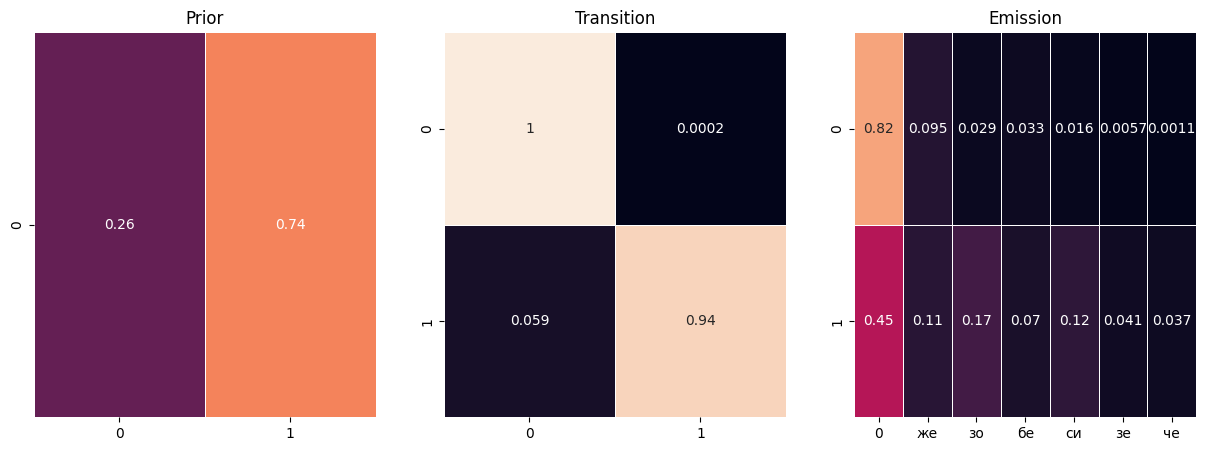

In [29]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
cfg = dict(
    linewidths=0.5, linecolor='white', vmin=0, vmax=1.0, annot=True, cbar=None
)
sns.heatmap(model.model.startprob_[None], ax=ax[0], **cfg)
ax[0].set_title('Prior')
sns.heatmap(model.model.transmat_, ax=ax[1], **cfg)
ax[1].set_title('Transition')
sns.heatmap(model.model.emissionprob_, ax=ax[2], **cfg)
ax[2].set_title('Emission')
ax[2].set_xticklabels([x[:2] if isinstance(x, str) else x for x in color_to_num.keys()][:-1])